In [1]:
#!python3 -m pip install xarray
#!python3 -m pip install plotly
#!python3 -m pip install geopandas
#!python3 -m pip install rasterstats
#!python3 -m pip install affine

In [2]:
# data analysis libraries
import os
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
from scipy import stats
import glob # check folder for similar file formats

# visualization libraries
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap
import plotly.plotly as py
py.sign_in('ctasich', 'fpoe1n01ek')
%matplotlib inline
%qtconsole

# geospatial
from utilities import hydroshare
import geopandas as gpd
from shapely.geometry import Point, shape
import rasterstats as rs
from rasterio import features
from affine import Affine

In [3]:
## Load Data

# GRACE data
nc = 'https://opendap.jpl.nasa.gov:443/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201701.GLO.RL05M_1.MSCNv02CRIv02.nc'
grace = xr.open_dataset(nc)

# Well data
#csv = 'https://www.hydroshare.org/django_irods/download/d3659dcf575d4090801a74d1ce096d7c/data/contents/WPDx_Well_Function_Upd_151224_xy161117.csv'
csv = os.path.join('/home/jovyan/work/notebooks/','haackwell','dat','well-data-2001-2015-no-rainwater.csv')
wells = pd.read_csv(csv)

In [4]:
hs=hydroshare.hydroshare()
hs.getResourceFromHydroShare('bf7b1abb7ec14599b644116d20efebd5')

Adding the following system variables:
   HS_USR_NAME = jphuong
   HS_RES_ID = bf7b1abb7ec14599b644116d20efebd5
   HS_RES_TYPE = compositeresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => jphuong
Successfully established a connection with HydroShare
This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? n


In [5]:
# map the Kenyan shapefile path
kenp = hs.content['KEN_adm1.shp']
print(kenp)

# map the parent directory for the shapefiles
HW2017 = os.path.join(kenp, os.pardir)
print(HW2017)

../../data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/KEN_adm1.shp
../../data/bf7b1abb7ec14599b644116d20efebd5/bf7b1abb7ec14599b644116d20efebd5/data/contents/KEN_adm1.shp/..


In [6]:
# retrieve the shapefile for kenya
# country boundary
Ken=gpd.read_file(kenp)
Ken

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,118,KEN,Kenya,1,Baringo,KE.BA,30,None,County,County,None,None,(POLYGON ((35.67241287231445 1.073058485984859...
1,118,KEN,Kenya,2,Bomet,KE.BO,36,None,County,County,None,None,POLYGON ((35.47388458251964 -0.395235478877907...
2,118,KEN,Kenya,3,Bungoma,KE.BN,39,None,County,County,None,None,"POLYGON ((34.61786651611339 1.108357429504508,..."
3,118,KEN,Kenya,4,Busia,KE.BS,40,None,County,County,None,None,"POLYGON ((34.3676567077639 0.7769606113433269,..."
4,118,KEN,Kenya,5,Elgeyo-Marakwet,KE.EM,28,None,County,County,None,None,(POLYGON ((35.46704483032249 1.007656216621456...
5,118,KEN,Kenya,6,Embu,KE.EB,14,None,County,County,None,None,(POLYGON ((37.31633377075212 -0.15351638197898...
6,118,KEN,Kenya,7,Garissa,KE.GA,7,None,County,County,None,None,"POLYGON ((39.5841064453125 0.7246704101563637,..."
7,118,KEN,Kenya,8,Homa Bay,KE.HB,43,None,County,County,None,None,POLYGON ((34.76070404052763 -0.308018475770950...
8,118,KEN,Kenya,9,Isiolo,KE.IS,11,None,County,County,None,None,"POLYGON ((38.96176147460943 2.099157094955558,..."
9,118,KEN,Kenya,10,Kajiado,KE.KJ,34,None,County,County,None,None,"POLYGON ((36.5361900329591 -1.152136445045414,..."


Axes(0.306243,0.125;0.412514x0.755)


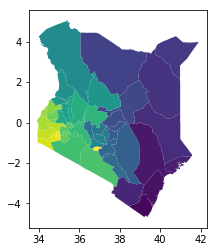

In [7]:
print(Ken.plot('CCN_1'))

In [18]:
# read many shape file in the folder
gdfs = {} # load the empty dictionary 

# loop through the adm2 shapfile
for fname in glob.glob(os.path.abspath(os.path.join(HW2017,'*_adm2.shp'))):
    print(os.path.basename(fname).split('.')[0])
    gdfs[os.path.basename(fname).split('.')[0]] = gpd.read_file(fname)

UGA_adm2
KEN_adm2
TZA_adm2


In [19]:
# compile each dataframe into a single, long dataframe
dfs_all = pd.concat([gdf for gdf in gdfs.values()])

# convert the geodataframe to a epsg:4326 projection
gdfs_all = gpd.GeoDataFrame(dfs_all, crs={'init': 'epsg:4326'}).reset_index().rename(columns={'index':'ISO_adm2_idx'})

# print the gdfs geometry
print(len(gdfs_all['geometry']))

# look at all annotations available for each adm2 shape
gdfs_all.tail()

658


,ISO_adm2_idx,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
653,178,227,TZA,Tanzania,28,Zanzibar North,179,Kaskazini 'B',TZ.ZN.NB,0,02,Wilaya,District,None,Kaskazini B|North B|Zansibar North|Zanzibar No...,(POLYGON ((39.2054176330567 -5.911527156829834...
654,179,227,TZA,Tanzania,29,Zanzibar South and Central,180,Kati,TZ.ZS.CE,0,01,Wilaya,District,None,Zanzibar Central,(POLYGON ((39.49652862548845 -6.12236118316650...
655,180,227,TZA,Tanzania,29,Zanzibar South and Central,181,Kusini,TZ.ZS.SO,0,02,Wilaya,District,None,Zanzibar South,POLYGON ((39.53041839599638 -6.177963256835938...
656,181,227,TZA,Tanzania,30,Zanzibar West,182,Magharibi,TZ.ZW.WE,0,01,Wilaya,District,None,Zanzibar West,(POLYGON ((39.33430480957037 -6.41708278655994...
657,182,227,TZA,Tanzania,30,Zanzibar West,183,Mjini,TZ.ZW.TO,0,02,Wilaya,District,None,Zanzibar Town,POLYGON ((39.21404266357439 -6.141998767852783...


In [20]:
# consider the NAME_1 for each adm2 polygon
gdfs_all.groupby('NAME_1').NAME_1.count().sort_values(ascending=False).head(60)

NAME_1
Nairobi        17
Kiambu         12
Bungoma        11
Kakamega       11
Nakuru         11
Mbeya          11
Meru           10
Tanga          10
Machakos        9
Arusha          9
Kagera          9
Homa Bay        9
Kigoma          9
Kisii           9
Kitui           8
Mara            8
Mbarara         8
Mwanza          8
Migori          8
Busia           8
Kilifi          7
Murang'a        7
Morogoro        7
Mtwara          7
Dodoma          7
Kilimanjaro     7
Pwani           7
Kisumu          7
Manyara         7
Mandera         7
Tabora          7
Arua            7
Simiyu          7
Turkana         7
Baringo         7
Makueni         6
Masindi         6
Lindi           6
Garissa         6
Singida         6
Mombasa         6
Trans Nzoia     6
Siaya           6
Uasin Gishu     6
Ruvuma          6
Rukwa           6
Wajir           6
Bushenyi        6
Nandi           6
Narok           6
West Pokot      6
Njombe          6
Kericho         6
Nyeri           6
Lira            6
Vih

In [21]:
# abstract the centroids for the adm2 polygons
centroidseries = gdfs_all['geometry'].centroid

# convert the centroids into a geodataframe
gdf_cent = gpd.GeoDataFrame(centroidseries.reset_index()).rename(columns={'index':'shape_index', 0:'adm2_centroid'})
gdf_cent['NAME_1'] = list(gdfs_all['NAME_1'])

# extract the longitude and latitude coordinate values into two columns
gdf_cent['LONG'] = gdf_cent.adm2_centroid.map(lambda x: x.x)
gdf_cent['LAT'] = gdf_cent.adm2_centroid.map(lambda x: x.y)
gdf_cent.tail()

,shape_index,adm2_centroid,NAME_1,LONG,LAT
653,653,POINT (39.27007937639715 -5.979889441893318),Zanzibar North,39.270079,-5.979889
654,654,POINT (39.37279707022884 -6.168625693550671),Zanzibar South and Central,39.372797,-6.168626
655,655,POINT (39.49270830009507 -6.339992032844444),Zanzibar South and Central,39.492708,-6.339992
656,656,POINT (39.25273389595376 -6.174943432105592),Zanzibar West,39.252734,-6.174943
657,657,POINT (39.20962246460051 -6.167291816464747),Zanzibar West,39.209622,-6.167292


In [22]:
# check the raster file (here use grace as example)
grace

<xarray.Dataset>
Dimensions:        (lat: 360, lon: 720, time: 159)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
  * lat            (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 ...
  * time           (time) datetime64[ns] 2002-04-16 2002-05-10 ...
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
Attributes:
    Conventions:                CF-1.5
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   CF-1.5
    title:                      JPL RL05M.1-CRI
    summary:                    Monthly gravity solutions from GRACE as deter...
    filename:                   NETCDF/OFFICIAL_V2/GRCTellus.JPL.200204_20170...
    variable:                   liquid_water_equivalent_thickness
    platform:                   GRACE
    instrument:                 GRACE
    institution:                JPL
    creator_name:               David Wiese

In [23]:
#thickness_variable
gw = grace['lwe_thickness']
gw.coords

Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * time     (time) datetime64[ns] 2002-04-16 2002-05-10 2002-08-16T12:00:00 ...

In [24]:
# generate a dictionary of GRACE time-series data that is closest in proximity to each adm2 polygon centroids
pgw=dict()

# loop through each adm2 polygon centroid
for ind, eachrow in gdf_cent.iterrows():
    pgw[ind] = gw.sel(lon=eachrow['LONG'], lat=eachrow['LAT'], method='nearest')
    
# look at a sample of the lwe_thickness xarray matrix
pgw[0]

<xarray.DataArray 'lwe_thickness' (time: 159)>
array([ -1.039637e+00,  -6.390368e-01,  -5.063786e+00,   2.484794e+00,
         9.132135e+00,   8.123268e+00,   6.770579e+00,   1.097183e+01,
        -2.636615e+00,  -4.698801e+00,  -3.541201e-01,   9.320220e+00,
         1.042992e+01,   1.419886e+01,   1.207920e+01,   9.112020e+00,
         1.006868e+01,   6.712198e+00,   9.099508e-01,  -1.618579e+00,
        -8.211127e+00,   4.852457e-02,   4.932359e+00,  -8.809608e-01,
         4.456342e-01,   1.693112e+00,   2.502687e+00,   7.589256e+00,
         8.651248e+00,   3.967227e+00,  -4.950921e+00,  -4.670325e+00,
        -6.780117e+00,  -7.476847e+00,  -2.938172e+00,   3.417719e+00,
         1.860694e+00,   4.271984e+00,   8.862738e+00,   7.944250e+00,
         6.153405e+00,  -1.671606e+00,  -7.793486e+00,  -1.293828e+01,
        -1.249543e+01,  -7.322933e+00,  -5.109123e+00,  -4.052846e+00,
        -2.731793e+00,   4.825332e+00,   3.149934e-01,  -2.067770e+00,
         3.247729e+00,   5.786

In [25]:
# get the well coordinate
wells['coord'] = wells.apply(lambda x: Point(x['LONG_DD'], x['LAT_DD']), axis=1)

# number of wells evaluated
print(len(wells))
wells.tail()

17341


,WELL_ID,LAT_DD,LONG_DD,FUNC,STATUS,COD_FCN,COD_QTY,COD_RESRCE,ADM1,ADM2,...,WATERTECH,INSTALLED,MGMT,PAY,SOURCE,RPT_DATE,RPT_YEAR,BKDWN_YEAR,coord,adm2_NAME_1
17336,484333,7.597172,5.230582,missing,missing,999,1,0,NaN,NaN,...,Unprotected dug well,0,NaN,NaN,mWater,2014-06-16,2014.0,2014.0,POINT (5.230582 7.597172),other
17337,483321,-2.511946,32.900248,missing,missing,999,1,0,NaN,NaN,...,Bottled water,0,NaN,NaN,Mwanza,2014-03-09,2014.0,2014.0,POINT (32.900248 -2.511946),other
17338,483841,7.408475,4.064835,missing,missing,999,1,0,NaN,NaN,...,Borehole or tubewell,0,NaN,NaN,mWater,2014-12-18,2014.0,2014.0,POINT (4.064835 7.408475),other
17339,483900,7.408560,4.064823,missing,missing,999,1,0,NaN,NaN,...,Borehole or tubewell,0,NaN,NaN,mWater,2014-12-18,2014.0,2014.0,POINT (4.064823000000001 7.40856),other
17340,490128,2.042674,32.745330,No,system is down for two years|Broken Parts|pipe...,0,1,0,Apac,Kwania,...,Not recorded,1958,NaN,No payment system,Lifeline,2014-11-23,2014.0,2014.0,POINT (32.7453297 2.04267372),Apac


In [26]:
# initiate
mod = wells
mod['adm2_NAME_1'] = 'other'
mod['adm2_NAME_1'] = mod.apply(lambda x: eachpol['NAME_1'] if x['coord'].intersects(eachpol['geometry']) else x['adm2_NAME_1'], axis=1)

In [28]:
# For each adm2 polygon (n=658) from the three countries (Kenya, Liberia, Tanzania), classify the wells to them.
poly_dict=dict()
mod = wells
mod['adm2_NAME_1'] = 'other'

print(len(gdfs_all))

for mdx, eachpol in gdfs_all.iterrows():
    well_ind = mod['coord'].apply(lambda x: x.intersects(eachpol['geometry']))

    if sum(well_ind)==0:
        continue
    else:
        mod.loc[well_ind,'adm2_NAME_1']=eachpol['NAME_1']
        if (mdx % 100==0):
            print(mdx)


658
0
100
200
600


In [29]:
mod.tail()

,WELL_ID,LAT_DD,LONG_DD,FUNC,STATUS,COD_FCN,COD_QTY,COD_RESRCE,ADM1,ADM2,...,WATERTECH,INSTALLED,MGMT,PAY,SOURCE,RPT_DATE,RPT_YEAR,BKDWN_YEAR,coord,adm2_NAME_1
17336,484333,7.597172,5.230582,missing,missing,999,1,0,NaN,NaN,...,Unprotected dug well,0,NaN,NaN,mWater,2014-06-16,2014.0,2014.0,POINT (5.230582 7.597172),other
17337,483321,-2.511946,32.900248,missing,missing,999,1,0,NaN,NaN,...,Bottled water,0,NaN,NaN,Mwanza,2014-03-09,2014.0,2014.0,POINT (32.900248 -2.511946),Mwanza
17338,483841,7.408475,4.064835,missing,missing,999,1,0,NaN,NaN,...,Borehole or tubewell,0,NaN,NaN,mWater,2014-12-18,2014.0,2014.0,POINT (4.064835 7.408475),other
17339,483900,7.408560,4.064823,missing,missing,999,1,0,NaN,NaN,...,Borehole or tubewell,0,NaN,NaN,mWater,2014-12-18,2014.0,2014.0,POINT (4.064823000000001 7.40856),other
17340,490128,2.042674,32.745330,No,system is down for two years|Broken Parts|pipe...,0,1,0,Apac,Kwania,...,Not recorded,1958,NaN,No payment system,Lifeline,2014-11-23,2014.0,2014.0,POINT (32.7453297 2.04267372),Apac


In [ ]:
len(poly_dict.keys())

In [ ]:
temp = pd.DataFrame.from_records(sorted(poly_dict.items(), key=lambda x: len(x[1]), reverse=True))
temp = temp.rename(columns={0: 'counties', 1:'WELL_ID'})
temp['WELL_COUNT'] = temp['WELL_ID'].apply(lambda x: len(x))
temp.head(100)

In [ ]:
temp.WELL_COUNT.sum()

In [ ]:
# subset the wells to the ones that are within a particular administrative area of interest
temp = wells.loc[wells['WELL_ID'].isin(poly_dict['Busia']),:]
t2 = temp.pivot_table(index='RPT_DATE',columns='FUNC', values='WELL_ID', aggfunc=lambda x: x.count()).fillna(0)
t2 = t2.cumsum()

t2.plot()
plt.xticks(rotation=20);
plt.title('Busia, Kenya')
plt.show()

t2['nonfuncratio']=t2['No']/t2['Yes']
t2['nonfuncratio'].plot()
plt.xticks(rotation=20);

In [ ]:
t2

In [ ]:
# look at the annotations for a single record
wells.loc[0,:]

In [ ]:
# grace_time_series
# .lwe_thickness
time_series=grace.sel(time=slice('2002-04-16', '2016-12-31'), lat=75.25, lon=180.25)
time_series

In [ ]:
gdfs.keys()

In [ ]:
## Preprocess data

## Wells
wells['color'] = np.where(wells['FUNC']=='Yes', '#2ECC71', '#E74C3C')

## GRACE
rmap = grace['lwe_thickness'][0,:,:]

# Extract Lat/Lon Metadata
lat_min = grace.geospatial_lat_min
lat_max = grace.geospatial_lat_max
lat_res = float(grace.geospatial_lat_resolution[0:3])

lon_min = grace.geospatial_lon_min
lon_max = grace.geospatial_lon_max
lon_res = float(grace.geospatial_lon_resolution[0:3])

In [ ]:
## Plot GRACE data

# Build grid
lon_g = np.arange(lon_min,lon_max+lon_res,lon_res)
lat_g = np.arange(lat_min,lat_max+lat_res,lat_res)
x,y = np.meshgrid(lon_g[:], lat_g[:])

# Plot Fig
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw parallels and meridians.
parallels = np.arange(-89.75,89.75,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',latlon=True);
im2 = m.pcolormesh(x,y,masked_array,shading='flat',latlon=True)
m.drawcoastlines();
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Water thickness equivalent (cm)')
plt.title('GRACE initial measurement',size=20);

In [ ]:
## Plot well data in plotly

data = [ dict(
    lat = wells.LAT_DD,
    lon = wells.LONG_DD,
    marker = dict(
        color = wells.color.tolist(),
        opacity = 0.7,
        size = 2,                
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 10,
        projection = dict(
            type = 'utm'),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -20, 80 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -20, 40 ],
            dtick = 5
        )
    ),
    title = 'Wells from WPDx',
)
fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='wells')

In [ ]:
# Code that subselects regions of interest. This is for all of Africa, but will be used later to get individual time series

data = xr.open_dataset('https://opendap.jpl.nasa.gov:443/opendap/GeodeticsGravity/tellus/L3/mascon/RL05/JPL/CRI/netcdf/GRCTellus.JPL.200204_201701.GLO.RL05M_1.MSCNv02CRIv02.nc')
af = xr.concat( [data['lwe_thickness'].sel(lat=slice(-37.75,37.75)).sel(lon=slice(340.25,359.75)),
                  data['lwe_thickness'].sel(lat=slice(-37.75,37.75)).sel(lon=slice(0.25,50.75))],
                  dim='lon')

lonaf = xr.concat( [data['lon'].sel(lon=slice(340.25,359.75)),
                  data['lon'].sel(lon=slice(0.25,50.75))],
                  dim='lon')

lataf = data['lat'].sel(lat=slice(-37.75,37.75))


In [ ]:
# Find nearest grid locations for all data
# lon_g and lat_g are the lons and lats of the gridded products, respectively
# nb this is only for Africa for now! Change things in the previous cell if you want to deal with the global GRACE dataset.

lon_g = lonaf
lat_g = lataf

xRes = np.median(np.diff(lon_g))
yRes = np.median(np.diff(lat_g))

# Define grid box centers
lon_c = lon_g[:-1]+xRes/2
lat_c = lat_g[:-1]+yRes/2

# Define a new metadata file that has grid coordinates for this resolution choice
wg = wells

wg.loc[:,'grid_lat'] = np.nan
wg.loc[:,'grid_lon'] = np.nan
wg.loc[:,'grace_mean'] = np.nan
wg.loc[:,'grace_std'] = np.nan
wg.loc[:,'grace_at_rpt_date'] = np.nan

## Determine grid_lat and grid_lon for every record

for index, row in wg.iterrows():
    lon_s = row[u'LONG_DD']
    lat_s = row[u'LAT_DD']
    # correct for wrapping
    if lon_s<0:
        lon_s = 360+lon_s
    glat = lat_g.values[np.argmin(np.abs(lat_c.values-lat_s))]
    glon = lon_g.values[np.argmin(np.abs(lon_c.values-lon_s))]
    wg.set_value(index,'grid_lat',glat)
    wg.set_value(index,'grid_lon',glon)

# Get all unique grid_lat and grid_lon pairs. Don't totally understand this bit of magic...
allpairs = wg[['grid_lat', 'grid_lon']].values
upairs = np.array(list(set(tuple(p) for p in allpairs)))

# GRACE at well locations. sel_points is necessary to get coordinate pairs.
wellG = data['lwe_thickness'].sel_points(lat=upairs[:,0],lon=upairs[:,1])




In [ ]:
# Loop through the dataframe again and compute stats!

for index, row in wg.iterrows():
    glat = row[u'grid_lat']
    glon = row[u'grid_lon']

    # get the corresponding point
    pt = wellG[(wellG['lat']==glat).values & (wellG['lon']==glon).values].points.values
    allhere = wellG.sel(points=pt)
    wg.set_value(index,'grace_mean',np.mean(allhere.values))
    wg.set_value(index,'grace_std',np.std(allhere.values))

    dda = row[u'RPT_DATE']
    dgr = allhere['time'].values
    best_gr_ind = np.argmin(np.abs(pd.to_datetime(dgr)-pd.to_datetime(dda)))

    wg.set_value(index,'grace_at_rpt_date',np.squeeze(allhere.values)[best_gr_ind])




In [ ]:
# Take a look
wg

In [ ]:
# Is there any relationship between GRACE and the well data?

# 1. Compare g_mean to g_rpt. Make 2 histograms, one for working and one for not. Anything there?


# differences between mean and report time GRACE values
d_mean_rpt_yes = wg[wg['FUNC']=='Yes' ]['grace_at_rpt_date']-wg[wg['FUNC']=='Yes']['grace_mean']
d_mean_rpt_no  = wg[wg['FUNC']=='No'  ]['grace_at_rpt_date']-wg[wg['FUNC']=='No' ]['grace_mean']

bins = np.arange(-40,40)

plt.hist(d_mean_rpt_yes,bins=bins,alpha=0.5,label='Not functioning')
plt.hist(d_mean_rpt_no ,bins=bins,alpha=0.5,label='Functioning')
plt.ylabel('Number of records')
plt.title('GRACE LWE at report dates for African sites minus 2002-2016 mean',size=12)
plt.legend(loc='upper right')
plt.xlabel('Anomaly in liquid water equivalent (cm)')
plt.show()

# 2. Histograms of g_std for working and not. Any difference?

d_std_yes = wg[wg['FUNC']=='Yes' ]['grace_std']
d_std_no  = wg[wg['FUNC']=='No'  ]['grace_std']

bins = np.arange(0,30)

plt.hist(d_std_yes,bins=bins,alpha=0.5,label='Not functioning')
plt.hist(d_std_no ,bins=bins,alpha=0.5,label='Functioning')
plt.ylabel('Number of records')
plt.title('GRACE standard deviation of LWE at African sites, 2002-2016')
plt.legend(loc='upper right')
plt.xlabel('Liquid water equivalent (cm)')
plt.show()

